In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("data/training.csv")

In [4]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1002,20,RL,75.0,11957,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,232000
1,1237,60,RL,41.0,12393,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Normal,195000
2,1378,160,RM,21.0,1953,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,83000
3,121,50,RM,50.0,6060,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,100000
4,389,60,RL,96.0,12474,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,New,Partial,426000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,365,70,RM,59.0,10690,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,147000
1164,818,80,RL,80.0,8816,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,155000
1165,125,190,RM,60.0,6780,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,84500
1166,866,20,RL,67.0,10656,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,11,2007,New,Partial,248900


In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(df.isnull().T,  cmap = 'viridis')

In [5]:
df.isnull().sum().sort_values(ascending=False)

PoolQC         1164
MiscFeature    1122
Alley          1096
Fence           934
FireplaceQu     568
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    959 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          72 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

<AxesSubplot:>

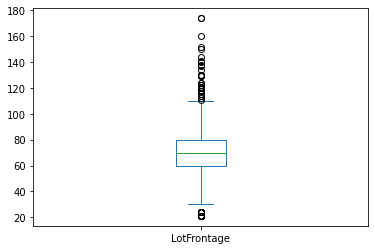

In [7]:
df["LotFrontage"].plot(kind="box")

In [8]:
df[["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu"]]

,PoolQC,MiscFeature,Alley,Fence,FireplaceQu
0,NaN,NaN,NaN,NaN,Gd
1,NaN,NaN,NaN,NaN,Gd
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,MnPrv,NaN
4,NaN,NaN,NaN,NaN,Ex
...,...,...,...,...,...
1163,NaN,NaN,NaN,NaN,NaN
1164,NaN,NaN,NaN,MnPrv,NaN
1165,NaN,NaN,NaN,NaN,NaN
1166,NaN,NaN,NaN,NaN,Gd


In [9]:
df = df.drop(["Id", "PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu"], axis=1)

In [10]:
df.isnull().sum().sort_values(ascending=False)

LotFrontage     209
GarageType       64
GarageYrBlt      64
GarageFinish     64
GarageQual       64
               ... 
BsmtUnfSF         0
TotalBsmtSF       0
MSZoning          0
HeatingQC         0
SalePrice         0
Length: 75, dtype: int64

In [11]:
df["LotFrontage"].describe()

count    959.000000
mean      69.424400
std       21.703984
min       21.000000
25%       60.000000
50%       70.000000
75%       80.000000
max      174.000000
Name: LotFrontage, dtype: float64

In [12]:
df["LotFrontage"].value_counts(dropna=False)

NaN      209
60.0     117
70.0      62
80.0      52
75.0      44
        ... 
150.0      1
152.0      1
140.0      1
38.0       1
138.0      1
Name: LotFrontage, Length: 101, dtype: int64

In [13]:
df.loc[df[df["LotFrontage"].isnull()].index, "LotFrontage"] = df["LotFrontage"].median()

In [14]:
df["GarageType"].unique()

array(['Attchd', 'BuiltIn', 'Detchd', nan, 'Basment', 'CarPort', '2Types'],
      dtype=object)

In [15]:
df.groupby("GarageType")["SalePrice"].describe()

,count,mean,std,min,25%,50%,75%,max
GarageType,,,,,,,,
2Types,4.0,144000.000000,39115.214431,87000.0,134250.0,159000.0,168750.0,171000.0
Attchd,702.0,202254.209402,80110.961816,60000.0,148625.0,183750.0,232450.0,755000.0
Basment,16.0,157740.187500,66752.338540,55993.0,133062.5,146500.0,172500.0,359100.0
BuiltIn,71.0,259924.338028,109873.333696,91000.0,184425.0,225000.0,312800.0,582933.0
CarPort,9.0,109962.111111,24638.183681,82000.0,95000.0,108000.0,110000.0,164900.0
Detchd,302.0,136035.844371,43405.942037,35311.0,110125.0,130000.0,151000.0,475000.0


In [16]:
df["GarageType"].fillna(df["GarageType"].value_counts().idxmax(), inplace=True)

In [17]:
df["GarageType"].value_counts(dropna=False)

Attchd     766
Detchd     302
BuiltIn     71
Basment     16
CarPort      9
2Types       4
Name: GarageType, dtype: int64

In [18]:
df["GarageYrBlt"].describe()

count    1104.000000
mean     1978.446558
std        24.473548
min      1900.000000
25%      1961.000000
50%      1979.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

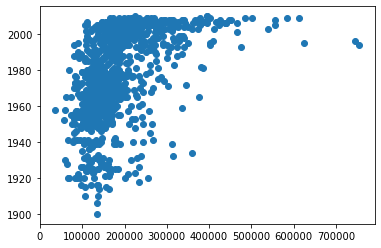

In [19]:
plt.scatter(df["SalePrice"], df["GarageYrBlt"])

<AxesSubplot:ylabel='Frequency'>

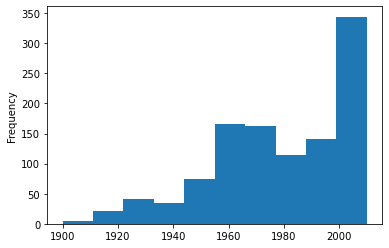

In [20]:
df["GarageYrBlt"].plot(kind="hist")

In [21]:
df["GarageYrBlt"].value_counts()

2005.0    49
2006.0    47
2007.0    42
2004.0    42
2003.0    40
          ..
1900.0     1
1934.0     1
1927.0     1
1938.0     1
1947.0     1
Name: GarageYrBlt, Length: 96, dtype: int64

<AxesSubplot:>

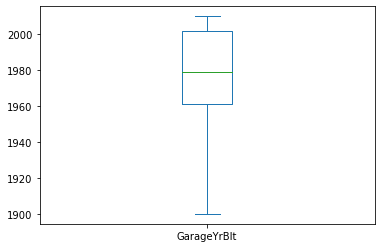

In [22]:
df["GarageYrBlt"].plot(kind="box")

In [23]:
sorted(df.columns.to_list())

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BedroomAbvGr',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtQual',
 'BsmtUnfSF',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'EnclosedPorch',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fireplaces',
 'Foundation',
 'FullBath',
 'Functional',
 'GarageArea',
 'GarageCars',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenAbvGr',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotArea',
 'LotConfig',
 'LotFrontage',
 'LotShape',
 'LowQualFinSF',
 'MSSubClass',
 'MSZoning',
 'MasVnrArea',
 'MasVnrType',
 'MiscVal',
 'MoSold',
 'Neighborhood',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PavedDrive',
 'PoolArea',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SalePrice',
 'SaleType',
 'ScreenPorch',
 'Stre

<AxesSubplot:>

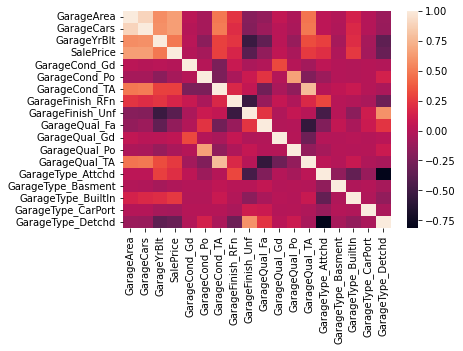

In [24]:
sns.heatmap(pd.get_dummies(df[['GarageArea',
 'GarageCars',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'GarageYrBlt',"SalePrice"]], drop_first=True).corr())

<AxesSubplot:>

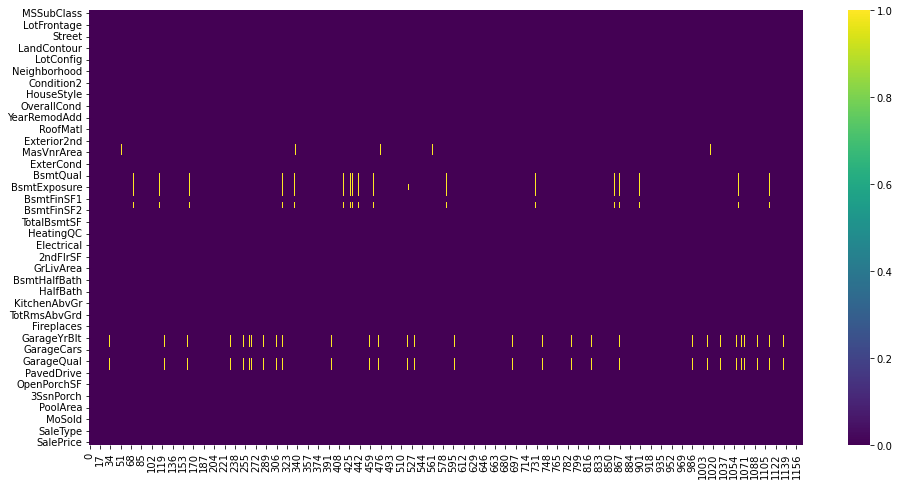

In [25]:
plt.figure(figsize=(16,8))
sns.heatmap(df.isnull().T,  cmap = 'viridis')

In [26]:
df["GarageYrBlt"] = df["GarageYrBlt"].fillna(df["GarageYrBlt"].quantile(.75)) # right skewed olduğu için 

In [27]:
df.isnull().sum().sort_values()

MSSubClass       0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath         0
                ..
BsmtExposure    31
BsmtFinType2    31
GarageQual      64
GarageCond      64
GarageFinish    64
Length: 75, dtype: int64

In [28]:
df["GarageFinish"].unique()

array(['RFn', 'Fin', 'Unf', nan], dtype=object)

In [29]:
df["GarageFinish"].value_counts(dropna=False)

Unf    484
RFn    338
Fin    282
NaN     64
Name: GarageFinish, dtype: int64

In [30]:
df["GarageCond"].value_counts(dropna=False)

TA     1061
NaN      64
Fa       29
Gd        7
Po        7
Name: GarageCond, dtype: int64

In [31]:
df["GarageQual"].value_counts(dropna=False)

TA     1044
NaN      64
Fa       43
Gd       13
Po        3
Ex        1
Name: GarageQual, dtype: int64

In [32]:
liste = ["GarageFinish", "GarageCond", "GarageQual"]
for i in liste:
    df[i] = df[i].fillna(df[i].value_counts().idxmax())

In [33]:
df.isnull().sum().sort_values()

MSSubClass       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
                ..
BsmtCond        30
BsmtFinType1    30
BsmtQual        30
BsmtExposure    31
BsmtFinType2    31
Length: 75, dtype: int64

In [34]:
df["BsmtFinType2"].unique()

array(['Unf', 'Rec', nan, 'LwQ', 'BLQ', 'GLQ', 'ALQ'], dtype=object)

In [35]:
df["BsmtFinType2"].value_counts(dropna=False)

Unf    998
Rec     48
LwQ     41
NaN     31
BLQ     27
ALQ     14
GLQ      9
Name: BsmtFinType2, dtype: int64

In [36]:
df["BsmtExposure"].value_counts(dropna=False)

No     752
Av     178
Gd     116
Mn      91
NaN     31
Name: BsmtExposure, dtype: int64

In [37]:
df["BsmtQual"].value_counts(dropna=False)

TA     522
Gd     483
Ex     103
Fa      30
NaN     30
Name: BsmtQual, dtype: int64

In [38]:
df["BsmtFinType1"].value_counts(dropna=False)

GLQ    335
Unf    332
ALQ    178
BLQ    115
Rec    112
LwQ     66
NaN     30
Name: BsmtFinType1, dtype: int64

In [39]:
df["BsmtCond"].value_counts(dropna=False)

TA     1047
Gd       53
Fa       36
NaN      30
Po        2
Name: BsmtCond, dtype: int64

In [40]:
for i in ["BsmtFinType1","BsmtQual","BsmtExposure","BsmtFinType2","BsmtCond"]:
    df[i] = df[i].fillna(df[i].value_counts().idxmax())

In [41]:
df.isnull().sum().sort_values(ascending=False)

MasVnrType      7
MasVnrArea      7
Electrical      1
BedroomAbvGr    0
Fireplaces      0
               ..
ExterCond       0
ExterQual       0
Exterior2nd     0
Exterior1st     0
SalePrice       0
Length: 75, dtype: int64

In [42]:
df["MasVnrType"].value_counts(dropna=False)

None       693
BrkFace    346
Stone      108
BrkCmn      14
NaN          7
Name: MasVnrType, dtype: int64

<AxesSubplot:xlabel='MasVnrType', ylabel='SalePrice'>

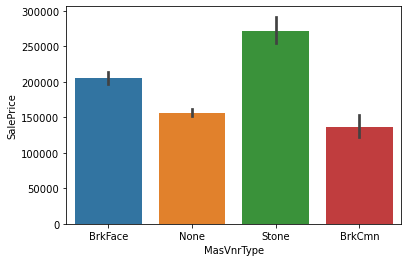

In [43]:
sns.barplot(x=df["MasVnrType"], y=df['SalePrice'])

In [44]:
df["MasVnrType"].describe()["top"]

'None'

In [45]:
df.loc[df[df["MasVnrType"].isnull()].index, "MasVnrType"] = df["MasVnrType"].describe()["top"]

In [46]:
df["MasVnrArea"].describe()

count    1161.000000
mean      103.794143
std       182.240694
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

<AxesSubplot:ylabel='Frequency'>

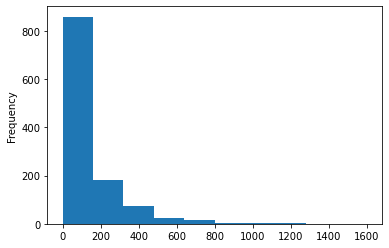

In [47]:
df["MasVnrArea"].plot(kind="hist")

In [48]:
df["MasVnrArea"] = df["MasVnrArea"].fillna(df["MasVnrArea"].mean())

In [49]:
df.isnull().sum().sort_values(ascending=False)

Electrical     1
MSSubClass     0
HalfBath       0
Fireplaces     0
Functional     0
              ..
MasVnrArea     0
MasVnrType     0
Exterior2nd    0
Exterior1st    0
SalePrice      0
Length: 75, dtype: int64

In [50]:
df["Electrical"].value_counts(dropna=False)

SBrkr    1064
FuseA      77
FuseF      22
FuseP       3
Mix         1
NaN         1
Name: Electrical, dtype: int64

In [51]:
df["Electrical"].fillna(df["Electrical"].value_counts().idxmax(), inplace=True)

In [52]:
df.isnull().sum().sort_values(ascending=False)

MSSubClass      0
GarageYrBlt     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
               ..
MasVnrArea      0
MasVnrType      0
Exterior2nd     0
Exterior1st     0
SalePrice       0
Length: 75, dtype: int64

<AxesSubplot:>

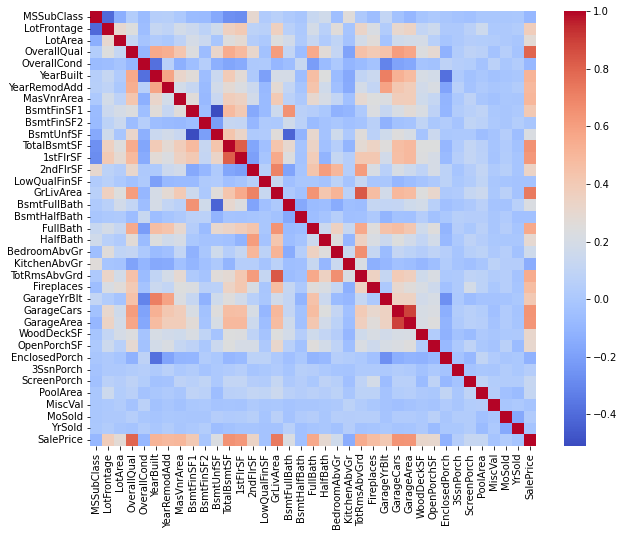

In [53]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="coolwarm")

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    1168 non-null   float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   LotShape       1168 non-null   object 
 6   LandContour    1168 non-null   object 
 7   Utilities      1168 non-null   object 
 8   LotConfig      1168 non-null   object 
 9   LandSlope      1168 non-null   object 
 10  Neighborhood   1168 non-null   object 
 11  Condition1     1168 non-null   object 
 12  Condition2     1168 non-null   object 
 13  BldgType       1168 non-null   object 
 14  HouseStyle     1168 non-null   object 
 15  OverallQual    1168 non-null   int64  
 16  OverallCond    1168 non-null   int64  
 17  YearBuilt      1168 non-null   int64  
 18  YearRemo

In [55]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import Lasso, Ridge, LassoCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor #, VotingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, cross_validate, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import AdaBoostRegressor
#from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [56]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20,RL,75.0,11957,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2008,WD,Normal,232000
1,60,RL,41.0,12393,Pave,IR2,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,9,2006,WD,Normal,195000
2,160,RM,21.0,1953,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2006,WD,Normal,83000
3,50,RM,50.0,6060,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,140,0,0,0,0,6,2007,WD,Normal,100000
4,60,RL,96.0,12474,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2008,New,Partial,426000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,70,RM,59.0,10690,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,218,0,0,0,0,7,2009,WD,Normal,147000
1164,80,RL,80.0,8816,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2010,WD,Normal,155000
1165,190,RM,60.0,6780,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2006,WD,Normal,84500
1166,20,RL,67.0,10656,Pave,IR1,HLS,AllPub,Inside,Gtl,...,0,0,0,0,0,11,2007,New,Partial,248900


In [57]:
df = pd.get_dummies(df, drop_first=True)

In [58]:
df.shape

(1168, 230)

In [89]:
df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20,75.0,11957,8,5,2006,2006,53.0,24,0,...,0,0,0,0,1,0,0,0,1,0
1,60,41.0,12393,7,5,2004,2005,0.0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,160,21.0,1953,6,5,1973,1973,408.0,309,0,...,0,0,0,0,1,0,0,0,1,0
3,50,50.0,6060,4,5,1939,1950,0.0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,60,96.0,12474,10,5,2007,2008,272.0,1280,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,70,59.0,10690,5,7,1920,1997,0.0,456,0,...,0,0,0,0,1,0,0,0,1,0
1164,80,80.0,8816,6,7,1971,1971,80.0,504,0,...,0,0,0,0,1,0,0,0,1,0
1165,190,60.0,6780,6,8,1935,1982,0.0,490,0,...,0,0,0,0,1,0,0,0,1,0
1166,20,67.0,10656,8,5,2006,2007,274.0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [59]:
X = df.drop(["SalePrice"], axis=1)
y = df["SalePrice"]

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [62]:
scaler = StandardScaler()

In [63]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [68]:
######################################################
# Base Models
######################################################
models = [('LR', LinearRegression()),
          ("Ridge", Ridge(random_state=42)),
          ("Lasso", Lasso(random_state=42)),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor(random_state=42)),
          ('RF', RandomForestRegressor(random_state=42)),
          ('SVR', SVR()),
          ('GBM', GradientBoostingRegressor(random_state=42)),
          ("XGBoost", XGBRegressor(objective='reg:squarederror',random_state=42)),
          ("LightGBM", LGBMRegressor(random_state=42))
          ]

for name, regressor in models:
    r2 = np.mean(cross_val_score(linear_model, X_train, y_train, cv =10, scoring="r2"))
    print(f"R2-Score: {round(r2, 4)} ({name}) ")
    print(cross_val_score(linear_model, X_train, y_train, cv =10, scoring="r2"))

R2-Score: -4.329390128170201e+22 (LR) 
[-2.32414539e+20 -3.70473999e+15 -3.76840361e+23 -7.80897796e+11
 -2.66721904e+22 -1.28965881e+21 -1.55326984e+21  8.53578585e-01
 -1.02145095e+17 -2.63510124e+22]
R2-Score: -4.329390128170201e+22 (Ridge) 
[-2.32414539e+20 -3.70473999e+15 -3.76840361e+23 -7.80897796e+11
 -2.66721904e+22 -1.28965881e+21 -1.55326984e+21  8.53578585e-01
 -1.02145095e+17 -2.63510124e+22]
R2-Score: -4.329390128170201e+22 (Lasso) 
[-2.32414539e+20 -3.70473999e+15 -3.76840361e+23 -7.80897796e+11
 -2.66721904e+22 -1.28965881e+21 -1.55326984e+21  8.53578585e-01
 -1.02145095e+17 -2.63510124e+22]
R2-Score: -4.329390128170201e+22 (KNN) 
[-2.32414539e+20 -3.70473999e+15 -3.76840361e+23 -7.80897796e+11
 -2.66721904e+22 -1.28965881e+21 -1.55326984e+21  8.53578585e-01
 -1.02145095e+17 -2.63510124e+22]
R2-Score: -4.329390128170201e+22 (CART) 
[-2.32414539e+20 -3.70473999e+15 -3.76840361e+23 -7.80897796e+11
 -2.66721904e+22 -1.28965881e+21 -1.55326984e+21  8.53578585e-01
 -1.021450

### Automated Hyperparameter Tuning

In [71]:

cart_params = {'max_depth': range(1, 6),
               "min_samples_split": range(2, 30)}
rf_params = {"max_depth": [6, None],
             "max_features": [5, 7, "auto"],
             "min_samples_split": [15, 20],
             "n_estimators": [500, 1000,2000]}
xgboost_params = {"learning_rate": [0.1, 0.01, 0.001],
                  "max_depth": [5,6],
                  "n_estimators": [200, 300, 500],
                  "colsample_bytree": [0.5, 0.7]}
lightgbm_params = {"learning_rate": [0.01, 0.1, 0.001],
                   "n_estimators": [500, 1500],
                   "colsample_bytree": [0.5, 0.7]}

regressors = [("CART", DecisionTreeRegressor(random_state=42), cart_params),
              ("RF", RandomForestRegressor(random_state=42), rf_params),
              ('XGBoost', XGBRegressor(objective='reg:squarederror',random_state=42), xgboost_params),
              ('LightGBM', LGBMRegressor(random_state=42), lightgbm_params)]
best_models = {}
for name, regressor, params in regressors:
    print(f"########## {name} ##########")
    r2 = np.mean(cross_val_score(regressor, X_train, y_train, cv =10, scoring="r2"))
    print(f"R2-Score: {round(r2, 4)} ({name}) ")
    gs_best = GridSearchCV(regressor, params, cv=3, n_jobs=-1, verbose=False).fit(X_train, y_train)
    final_model = regressor.set_params(**gs_best.best_params_)
    r2 = np.mean(cross_val_score(regressor, X_train, y_train, cv =10, scoring="r2"))
    print(f"R2-Score (After): {round(r2, 4)} ({name}) ")
    print(np.mean(cross_val_score(regressor, X_train, y_train, cv =10, scoring="r2")))
    print(f"{name} best params: {gs_best.best_params_}", end="\n\n")
    best_models[name] = final_model

########## CART ##########
R2-Score: 0.7111 (CART) 
R2-Score (After): 0.7256 (CART) 
0.7256099477348674
CART best params: {'max_depth': 5, 'min_samples_split': 17}

########## RF ##########
R2-Score: 0.875 (RF) 
R2-Score (After): 0.8669 (RF) 
0.8669219306414823
RF best params: {'max_depth': None, 'max_features': 'auto', 'min_samples_split': 15, 'n_estimators': 2000}

########## XGBoost ##########
R2-Score: 0.8873 (XGBoost) 
R2-Score (After): 0.9057 (XGBoost) 
0.9057452193101263
XGBoost best params: {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500}

########## LightGBM ##########
R2-Score: 0.8906 (LightGBM) 
R2-Score (After): 0.9019 (LightGBM) 
0.9019256522974896
LightGBM best params: {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'n_estimators': 1500}



In [72]:
lgm_reg = LGBMRegressor(colsample_bytree=.5, learning_rate=.01, n_estimators=1500)

In [73]:
lgm_reg.fit(X_train,y_train)

LGBMRegressor(colsample_bytree=0.5, learning_rate=0.01, n_estimators=1500)

In [74]:
cross_validate(lgm_reg, X_train, y_train, cv=10, return_train_score=True)

{'fit_time': array([3.14805984, 3.16005492, 3.63576221, 3.4288888 , 3.09209776,
        3.03213382, 3.36393046, 3.06811333, 3.03413129, 3.29197478]),
 'score_time': array([0.01499271, 0.00899673, 0.00899601, 0.01799035, 0.02298498,
        0.00999784, 0.00899529, 0.00899601, 0.0199883 , 0.01199269]),
 'test_score': array([0.89177755, 0.88565501, 0.92851268, 0.91772327, 0.87761687,
        0.93717181, 0.8941096 , 0.88401204, 0.88237896, 0.90360786]),
 'train_score': array([0.99181167, 0.98930605, 0.99018483, 0.99104471, 0.99117328,
        0.9905275 , 0.98908381, 0.99159001, 0.98971841, 0.98981696])}

In [75]:
df1 = pd.DataFrame(cross_validate(lgm_reg, X_train, y_train, cv=10, return_train_score=True))

In [76]:
df1.mean()

fit_time       3.159455
score_time     0.010196
test_score     0.900257
train_score    0.990426
dtype: float64

In [77]:
r2_score(y_test, lgm_reg.predict(X_test))

0.7652159848893398

In [78]:
xgboost_reg = XGBRegressor(colsample_bytree=.5, learning_rate=.1, max_depth=5, n_estimators=500)

In [79]:
xgboost_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [80]:
cross_validate(xgboost_reg, X_train, y_train, cv=10, return_train_score=True)

{'fit_time': array([1.72493696, 1.81388283, 1.78090477, 1.69195724, 1.82487822,
        1.72393966, 1.70794988, 1.67097187, 2.03374743, 1.68896008]),
 'score_time': array([0.00899458, 0.00899482, 0.00799489, 0.00799632, 0.00799346,
        0.00799608, 0.00799417, 0.00899553, 0.00899482, 0.00799417]),
 'test_score': array([0.90213047, 0.91971092, 0.92768613, 0.92791076, 0.87224804,
        0.92877801, 0.87359008, 0.87095721, 0.92934682, 0.88640483]),
 'train_score': array([0.99988886, 0.99985918, 0.9998787 , 0.99984636, 0.99987265,
        0.99985925, 0.99988583, 0.99984532, 0.99981329, 0.99989887])}

In [81]:
df_xg = pd.DataFrame(cross_validate(xgboost_reg,  X_train, y_train, cv=10, return_train_score=True))

In [82]:
df_xg.mean()

fit_time       1.713247
score_time     0.008294
test_score     0.903876
train_score    0.999865
dtype: float64

In [83]:
r2_score(y_test, xgboost_reg.predict(X_test))

0.7129316702919013

In [84]:
fold = KFold(n_splits=20, shuffle=True)

In [85]:
df2 = pd.DataFrame(cross_validate(lgm_reg, X, y, cv=fold, n_jobs=-1, return_train_score=True, 
                                  scoring=['r2', "neg_mean_absolute_error"]))

In [86]:
df2.describe()

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_median_absolute_error,train_neg_median_absolute_error
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,4.746679,0.043873,0.887801,0.985959,-15595.285372,-3837.091656,-9046.288238,-2181.203673
std,0.437128,0.010631,0.084637,0.001436,3504.345358,91.123821,1278.501996,49.262099
min,4.232396,0.028983,0.563359,0.984820,-23128.649935,-3971.590566,-10693.972665,-2266.997789
25%,4.360065,0.037975,0.876617,0.985319,-17147.960900,-3884.637956,-10138.410545,-2205.627398
50%,4.656136,0.041475,0.907962,0.985608,-15250.044041,-3852.670556,-9268.849175,-2181.328711
75%,4.928966,0.047221,0.931045,0.986125,-12556.145515,-3807.492320,-7678.110779,-2156.637865
max,5.656517,0.074955,0.950361,0.991634,-11582.847305,-3631.209785,-7202.102040,-2046.384572


In [87]:
df3 = pd.DataFrame(cross_validate(xgboost_reg, X, y, cv=fold, n_jobs=-1, return_train_score=True, 
                                  scoring=['r2', "neg_mean_absolute_error"]))

In [88]:
df3.describe()

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,7.507679,0.011893,0.856171,0.999693,-16180.453767,-1013.669152
std,0.419310,0.003929,0.176176,0.000044,2585.421786,70.990326
min,7.049660,0.008994,0.133714,0.999626,-21603.737752,-1128.691955
25%,7.137606,0.009744,0.862621,0.999663,-17861.598154,-1069.475605
50%,7.371462,0.009996,0.893289,0.999691,-16173.330177,-1006.764606
75%,7.821686,0.012242,0.935145,0.999726,-14869.395908,-965.515654
max,8.155979,0.023984,0.960667,0.999768,-11461.453390,-902.594454


In [92]:
import joblib

liste = X.columns.to_list()
joblib.dump(liste, "yeni_kolonlar")

['yeni_kolonlar']

In [102]:
joblib.dump(lgm_reg, "yeni_tahminci.joblib")

['yeni_tahminci.joblib']

In [67]:
######################################################
# Base Models
######################################################
models = [('LR', LinearRegression()),
          ("Ridge", Ridge(random_state=42)),
          ("Lasso", Lasso(random_state=42)),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor(random_state=42)),
          ('RF', RandomForestRegressor(random_state=42)),
          ('SVR', SVR()),
          ('GBM', GradientBoostingRegressor(random_state=42)),
          ("XGBoost", XGBRegressor(objective='reg:squarederror',random_state=42)),
          ("LightGBM", LGBMRegressor(random_state=42))
          ]

for name, regressor in models:
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=10, scoring="neg_mean_squared_error")))
    print(f"RMSE: {round(rmse, 4)} ({name}) ")
    print(np.sqrt(-cross_val_score(regressor, X, y, cv=10, scoring="neg_mean_squared_error")))

RMSE: 30207.6446 (LR) 
[28255.5291176  25832.07660469 20844.41918234 25058.07592667
 38440.46207524 30444.23455932 23182.67198765 53459.75056606
 23188.73351724 33370.49242692]
RMSE: 28398.4284 (Ridge) 
[26273.77951145 25446.64422342 19841.18041346 23824.7554947
 35470.621827   27401.48237513 20394.48961266 51355.20699418
 22371.78463853 31604.33855051]
RMSE: 29815.6184 (Lasso) 
[28003.25551482 25757.83385271 20548.66600199 24933.18149302
 37116.35037236 30042.46746855 22859.70574872 52965.84693247
 23046.31980861 32882.55703826]
RMSE: 48561.6745 (KNN) 
[40364.1603072  35101.52200272 46552.02199736 44968.63718529
 64782.67931237 45183.83386692 37956.75839087 67764.2554869
 43450.96962606 59491.90672525]
RMSE: 43476.0092 (CART) 
[38079.90043373 40811.75086877 30243.26415208 38796.61843677
 49681.56279602 42770.12314659 40250.04940189 70186.93810732
 39220.53821232 44719.346943  ]
RMSE: 29018.0322 (RF) 
[24698.25140801 23388.03573858 25245.96348108 25734.01773261
 34598.32978412 26779.48

In [92]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20,75.0,11957,8,5,2006,2006,53.0,24,0,...,0,0,0,0,1,0,0,0,1,0
1,60,41.0,12393,7,5,2004,2005,0.0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,160,21.0,1953,6,5,1973,1973,408.0,309,0,...,0,0,0,0,1,0,0,0,1,0
3,50,50.0,6060,4,5,1939,1950,0.0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,60,96.0,12474,10,5,2007,2008,272.0,1280,0,...,0,0,1,0,0,0,0,0,0,1


In [93]:
X.reindex(["LotFrontage","LotArea", "A"], axis=1)

,LotFrontage,LotArea,A
0,75.0,11957,NaN
1,41.0,12393,NaN
2,21.0,1953,NaN
3,50.0,6060,NaN
4,96.0,12474,NaN
...,...,...,...
1163,59.0,10690,NaN
1164,80.0,8816,NaN
1165,60.0,6780,NaN
1166,67.0,10656,NaN
